In [1]:
%load_ext autoreload
%autoreload 2

# Get parent root directory and add to sys.path
import sys, os
parent_dir = os.path.dirname(os.getcwd())
sys.path.append(parent_dir)

# Require ipympl
%matplotlib widget 

In [2]:
from src.rocket import Rocket
from src.pos_rocket_vis import *
from LandMPC.nmpc_land import NmpcCtrl
import numpy as np

rocket_obj_path = os.path.join(parent_dir, "Cartoon_rocket.obj")
rocket_params_path = os.path.join(parent_dir,"rocket.yaml")

# Rocket setup
Ts  = 1/20
rocket = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
rocket.mass = 1.7 # Do not change!!!

# Visualization setup
vis = RocketVis(rocket, rocket_obj_path)
vis.anim_rate = 1

In [3]:
sim_time = 10.0 

x0 = np.array(
    [0., 0., 0.,                 
     0., 0., np.deg2rad(30.0),   
     0., 0., 0.,                 
     3., 2., 10.],               
    dtype=float
)

x_ref = np.array([0.]*9 + [1., 0., 3.], dtype=float)

xs, us = rocket.trim(x_ref)
print("Linearization around a steady state:")
print("x_ref = ", x_ref)
print("xs = ", xs)
print("us = ", us)

H = 1.5  
nmpc = NmpcCtrl(rocket, H, xs, us)



******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

Linearization around a steady state:
x_ref =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
xs =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 3.]
us =  [ 0.          0.         56.66666667  0.        ]


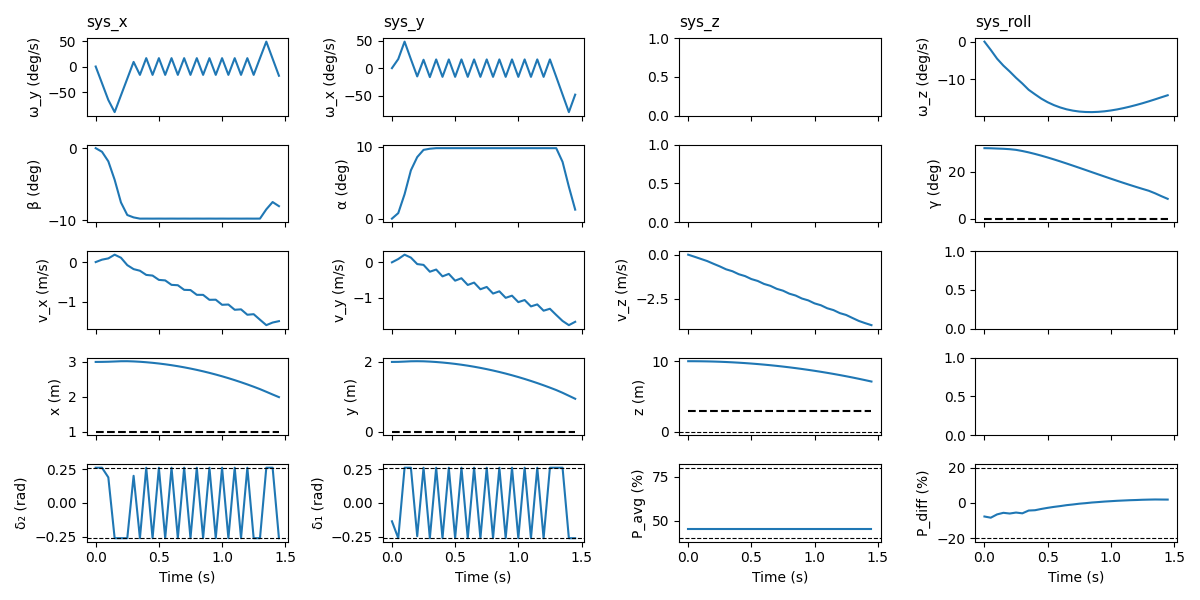

In [4]:
# Open loop
u0_ol, x_ol, u_ol, t_ol = nmpc.get_u(0.0, x0)
plot_static_states_inputs(t_ol[:-1], x_ol[:, :-1], u_ol, xs)


In [5]:
# Closed loop
t_cl, x_cl, u_cl, t_ol_hist, x_ol_hist, u_ol_hist = rocket.simulate_land(nmpc, sim_time, H, x0)


Simulating time 0.00
Simulating time 1.00
Simulating time 2.00
Simulating time 3.00
Simulating time 4.00
Simulating time 5.00
Simulating time 6.00
Simulating time 7.00
Simulating time 8.00
Simulating time 9.00


AppLayout(children=(HBox(children=(Play(value=0, description='Press play', max=199, step=2), IntSlider(value=0…

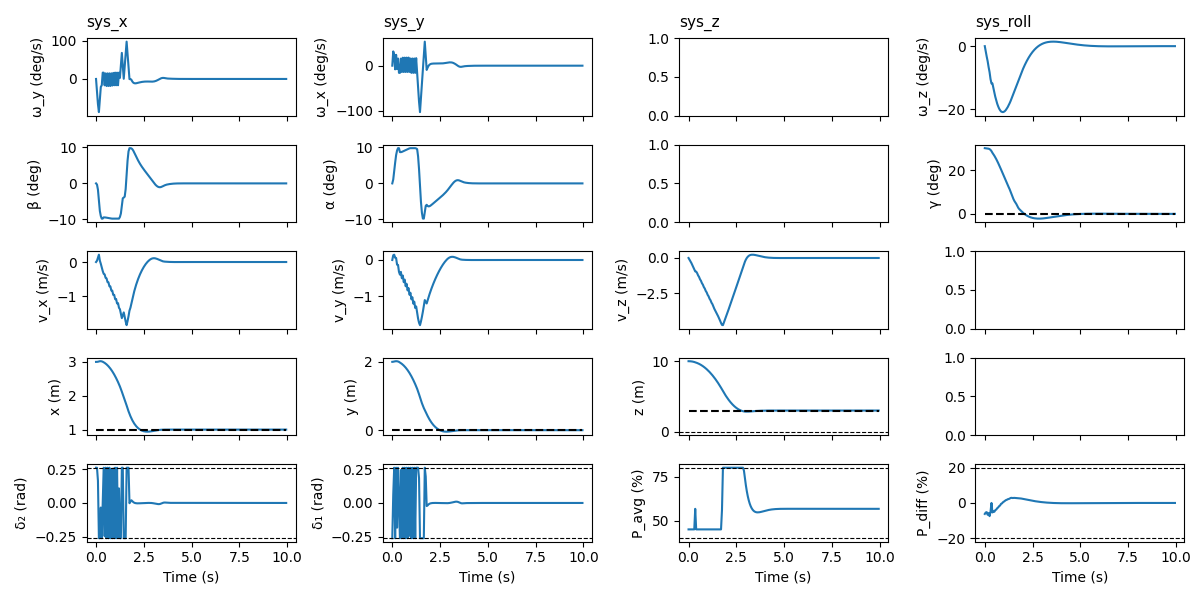

In [6]:
vis.animate(t_cl[:-1], x_cl[:, :-1], u_cl, T_ol=t_ol_hist[..., :-1], X_ol=x_ol_hist, U_ol=u_ol_hist)
plot_static_states_inputs(t_cl[:-1], x_cl[:, :-1], u_cl, xs)


A =
 [[1.   0.  ]
 [0.05 1.  ]]
B =
 [[0.00865235]
 [0.00021631]]
K_lqr =
 [[20.39369744 28.80585866]]
K =
 [[-20.39369744 -28.80585866]]
P =
 [[1274.23382763 1829.11834887]
 [1829.11834887 7079.70475038]]
A_cl =
 [[ 0.82354653 -0.24923846]
 [ 0.04558866  0.99376904]]
eig(A_cl) = [0.90865779+0.06417572j 0.90865779-0.06417572j]
max |eig(A_cl)| = 0.9109212333425355
Minimal robust invariant set computation converged after 40 iterations.
Maximum invariant set successfully computed after 14 iterations.
Maximum invariant set successfully computed after 18 iterations.


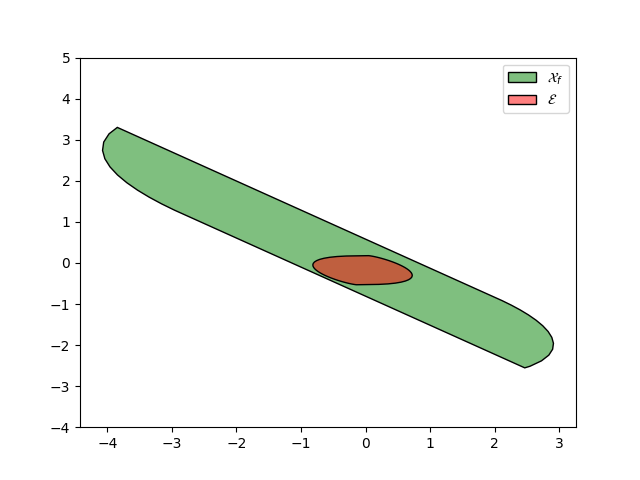

Simulating time 0.00
Simulating time 1.00
Simulating time 2.00
Simulating time 3.00
Simulating time 4.00
Simulating time 5.00
Simulating time 6.00
Simulating time 7.00
Simulating time 8.00
Simulating time 9.00
NMPC vs Linear MPC (Part 6.2) — closed-loop plots:


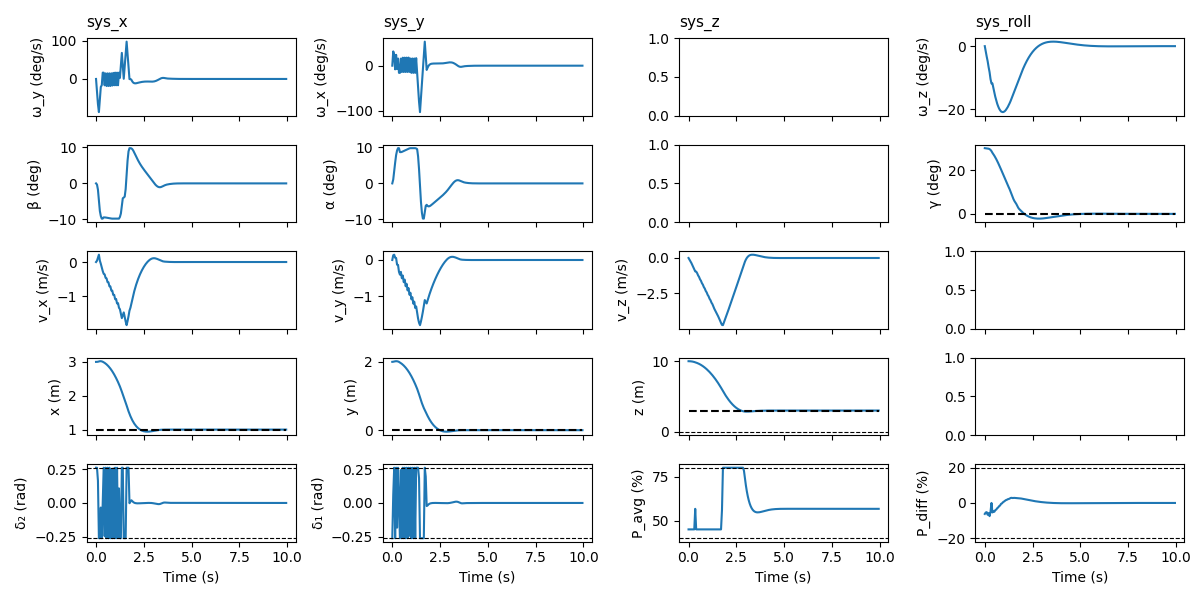

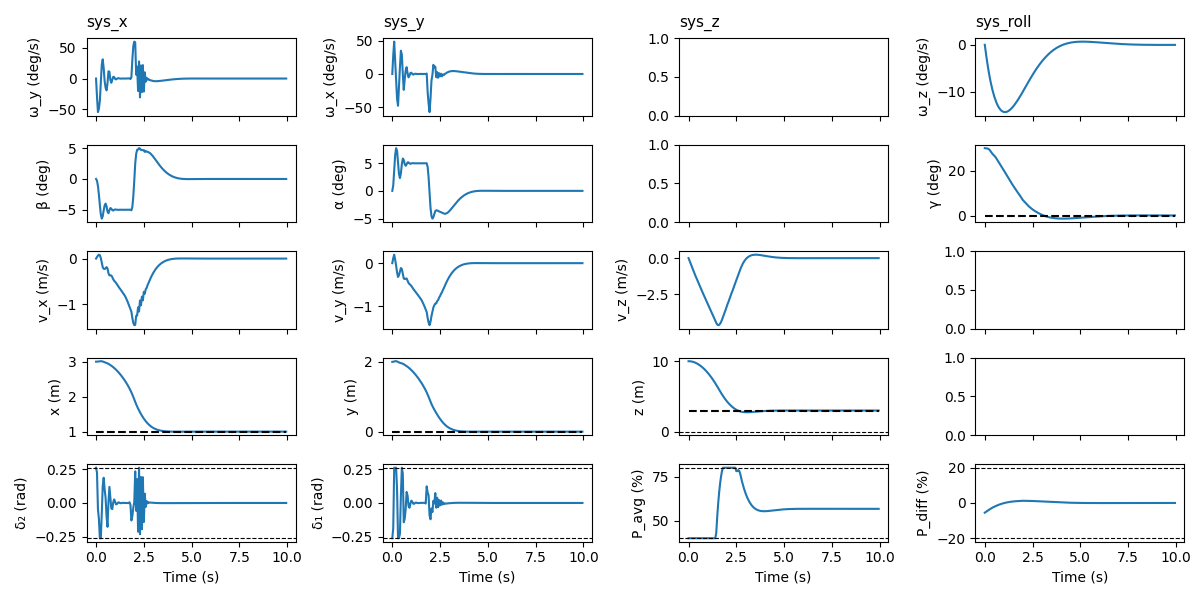

In [7]:
# Compare vs Part 6.2 merged linear MPC
from Deliverable_6_12.LandMPC.MPCLandControl import MPCLandControl

rocket2 = Rocket(Ts=Ts, model_params_filepath=rocket_params_path)
rocket2.mass = 1.7

H_lin = 4.0
mpc_lin = MPCLandControl().new_controller(rocket2, Ts, H_lin, x_ref=x_ref)

t_cl2, x_cl2, u_cl2, t_ol2, x_ol2, u_ol2 = rocket2.simulate_land(mpc_lin, sim_time, H_lin, x0)

print("NMPC vs Linear MPC (Part 6.2) — closed-loop plots:")
plot_static_states_inputs(t_cl[:-1],  x_cl[:, :-1],  u_cl,  xs)
plot_static_states_inputs(t_cl2[:-1], x_cl2[:, :-1], u_cl2, xs)
